### Gleb Iakovlev, CSC 578 Homework2 

### Import original source file 

In [36]:
import NN578_network as network
import numpy as np
net4 = network.load_network("iris-423.dat.txt")

# Create two data instances on the fly
inst1 = (np.array([5.7, 3, 4.2, 1.2]), np.array([0., 1., 0.]))
x1 = np.reshape(inst1[0], (4, 1))
y1 = np.reshape(inst1[1], (3, 1))
sample1 = [(x1, y1)]
inst2 = (np.array([4.8, 3.4, 1.6, 0.2]), np.array([1., 0., 0.]))
x2 = np.reshape(inst2[0], (4, 1))
y2 = np.reshape(inst2[1], (3, 1))
sample2 = [(x2, y2)]

# Call SGD with one instance for training and another for testing
results1 = net4.SGD(sample1, 1, 1, 1.0,True, sample2)


[Epoch 0] Training: MSE=0.26673128660052947, CrossEntropy=1.6169006088912665, LogLikelihood =0.4593083419698332, Correct= 1 / 1 Acc: 1.0
[Epoch 0] Test: MSE=0.3244002758397572, CrossEntropy=1.855818621521176, LogLikelihood =0.5871219174966811, Correct= 0 / 1 Acc: 0.0


### 2b. Return SGD evaluation  history list 

In [37]:
print(results1)

[[1, 1.0, 0.26673128660052947, 1.6169006088912665, 0.4593083419698332], [0, 0.0, 0.3244002758397572, 1.855818621521176, 0.5871219174966811]]


In [38]:
net4 = network.load_network("iris-423.dat.txt")
results2 = net4.SGD(sample1, 1, 1, 1.0,False)
print (results2)

[[1, 1.0, 0.26673128660052947, 1.6169006088912665, 0.4593083419698332], []]


### 2c . Early stopping

In [39]:
# Function to load the iris train-test (separate) data files
def my_load_csv(fname, no_trainfeatures, no_testfeatures):
    ret = np.genfromtxt(fname, delimiter=',')
    data = np.array([(entry[:no_trainfeatures],entry[no_trainfeatures:]) for entry in ret])
    temp_inputs = [np.reshape(x, (no_trainfeatures, 1)) for x in data[:,0]]
    temp_results = [np.reshape(y, (no_testfeatures, 1)) for y in data[:,1]]
    dataset = list(zip(temp_inputs, temp_results))
    return dataset

# Call the function to load the data
iris_data = my_load_csv('iris.csv', 4, 3)

In [40]:
# Reload the network
net2 = network.load_network("iris-423.dat.txt")
# Set the termination percentage
net2.termpercent = 0.6
# Train the network (for max of 100 epochs, minibatch_size=20, eta=1.0)
results = net2.SGD(iris_data, 100, 20, 1.0,False)

[Epoch 6] Training: MSE=0.29530520164482355, CrossEntropy=1.733591651577271, LogLikelihood =0.6235379306734548, Correct= 100 / 150 Acc: 0.6666666666666666


In [41]:
# Reload the network
net2 = network.load_network("iris-423.dat.txt")
# Set the termination percentage
net2.termpercent = 0.8
# Train the network (for max of 100 epochs, minibatch_size=20, eta=1.0)
results = net2.SGD(iris_data, 100, 20, 1.0,False)

[Epoch 86] Training: MSE=0.13644322390031177, CrossEntropy=0.8780155658563505, LogLikelihood =0.3477688661909535, Correct= 121 / 150 Acc: 0.8066666666666666


### 3. Deeper network 

In [42]:
# Reload the network
net2 = network.load_network("iris4-20-7-3.dat.txt")
# Set the termination percentage
net2.termpercent = 0.6
# Set network layers sizes 
net2.sizes = [4,20,7,3]
# Train the network (for max of 100 epochs, minibatch_size=20, eta=1.0)
results = net2.SGD(iris_data, 100, 20, 1.0,False)

[Epoch 33] Training: MSE=0.2988404836604327, CrossEntropy=1.7217813065464929, LogLikelihood =0.28740732324328105, Correct= 99 / 150 Acc: 0.66


In [43]:
# Reload the network
net2 = network.load_network("iris4-20-7-3.dat.txt")
# Set the termination percentage
net2.termpercent = 0.8
# Set network layers sizes 
net2.sizes = [4,20,7,3]
# Train the network (for max of 130 epochs, minibatch_size=20, eta=1.0)
results = net2.SGD(iris_data, 130, 20, 1.0,False)

[Epoch 125] Training: MSE=0.13069537291927866, CrossEntropy=0.8151871491068344, LogLikelihood =0.10405895855963886, Correct= 120 / 150 Acc: 0.8


## Visualizing network learning 

#### Split into testing and training 

In [44]:
from numpy.random import RandomState
import pandas as pd
df = pd.read_csv('iris.csv')
rng = RandomState()
train = df.sample(frac=0.7, random_state=rng)
test = df.loc[~df.index.isin(train.index)]
test = test.iloc[1:]
train = train.iloc[1:]
train.to_csv('iris_train.csv',index=False)
test.to_csv('iris_test.csv',index=False)

In [45]:
# Reload the network
net2 = network.load_network("iris4-20-7-3.dat.txt")
# Set the termination percentage
# Set network layers sizes 
net2.sizes = [4,30,7,3]
iris_train = my_load_csv('iris_train.csv', 4, 3)
iris_test = my_load_csv('iris_test.csv', 4, 3)

# Train the network 
results = net2.SGD(iris_train, 115, 25, 1.225,False,iris_test)

In [46]:
data_train = [x for x in results if x[0] == 1 ]

In [47]:
data_test = [x for x in results if x[0] == 0 ]

### Create plots

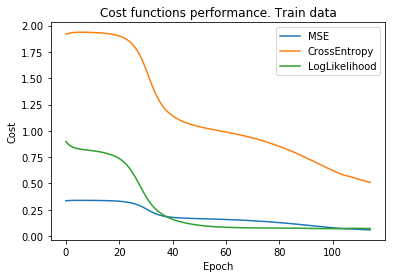

In [48]:
import matplotlib.pyplot as plt
mat_train = np.vstack(data_train)
transposed_train =  mat_train.T

fig = plt.figure()
ax = plt.subplot(111)
ax.plot(transposed_train[2],label = 'MSE')
ax.plot(transposed_train[3],label = 'CrossEntropy' )
ax.plot(transposed_train[4],label = 'LogLikelihood')
plt.title('Cost functions performance. Train data')
plt.xlabel('Epoch')
plt.ylabel('Cost')
ax.legend()
plt.show()

### Check test data 

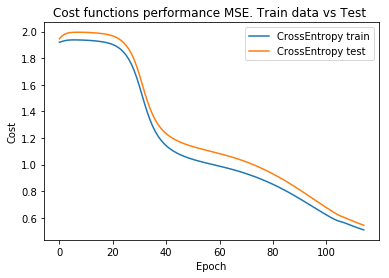

In [51]:
mat_test = np.vstack(data_test)
transposed_test =  mat_test.T
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(transposed_train[3],label = 'CrossEntropy train')
ax.plot(transposed_test[3],label = 'CrossEntropy test')
plt.title('Cost functions performance MSE. Train data vs Test ')
plt.xlabel('Epoch')
plt.ylabel('Cost')
ax.legend()
plt.show()


### Train vs Test accuracy

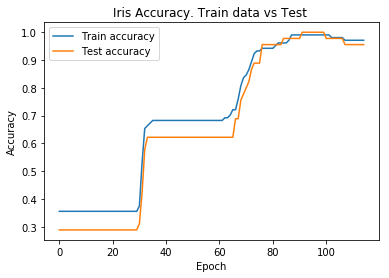

In [50]:
mat_test = np.vstack(data_test)
transposed_test =  mat_test.T
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(transposed_train[1],label = 'Train accuracy')
ax.plot(transposed_test[1],label = 'Test accuracy')
plt.title('Iris Accuracy. Train data vs Test ')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
ax.legend()
plt.show()